# Igor Balagula
## Week 6 Assignment

In [14]:
#!/usr/bin/env python
"""
Davis Southern Club Women

Shows how to make unipartite projections of the graph and compute the
properties of those graphs.

These data were collected by Davis et al. in the 1930s.
They represent observed attendance at 14 social events by 18 Southern women.
The graph is bipartite (clubs, women).
"""
import networkx as nx
import networkx.algorithms.bipartite as bipartite
import matplotlib.pyplot as plt
%matplotlib inline

G = nx.davis_southern_women_graph()
women = G.graph['top']
clubs = G.graph['bottom']

print("Biadjacency matrix")
print(bipartite.biadjacency_matrix(G,women,clubs))



Biadjacency matrix
  (0, 0)	1
  (0, 1)	1
  (0, 2)	1
  (0, 3)	1
  (0, 4)	1
  (0, 5)	1
  (0, 7)	1
  (0, 8)	1
  (1, 0)	1
  (1, 1)	1
  (1, 2)	1
  (1, 4)	1
  (1, 5)	1
  (1, 6)	1
  (1, 7)	1
  (2, 1)	1
  (2, 2)	1
  (2, 3)	1
  (2, 4)	1
  (2, 5)	1
  (2, 6)	1
  (2, 7)	1
  (2, 8)	1
  (3, 0)	1
  (3, 2)	1
  :	:
  (12, 7)	1
  (12, 8)	1
  (12, 9)	1
  (12, 11)	1
  (12, 12)	1
  (12, 13)	1
  (13, 5)	1
  (13, 6)	1
  (13, 8)	1
  (13, 9)	1
  (13, 10)	1
  (13, 11)	1
  (13, 12)	1
  (13, 13)	1
  (14, 6)	1
  (14, 7)	1
  (14, 9)	1
  (14, 10)	1
  (14, 11)	1
  (15, 7)	1
  (15, 8)	1
  (16, 8)	1
  (16, 10)	1
  (17, 8)	1
  (17, 10)	1


In [15]:
# project bipartite graph onto women nodes
W = bipartite.projected_graph(G, women)
print('')
print("#Friends, Member")
for w in women:
    print('%d %s' % (W.degree(w),w))







#Friends, Member
17 Evelyn Jefferson
15 Laura Mandeville
17 Theresa Anderson
15 Brenda Rogers
11 Charlotte McDowd
15 Frances Anderson
15 Eleanor Nye
16 Pearl Oglethorpe
17 Ruth DeSand
17 Verne Sanderson
16 Myra Liddel
16 Katherina Rogers
17 Sylvia Avondale
17 Nora Fayette
17 Helen Lloyd
16 Dorothy Murchison
12 Olivia Carleton
12 Flora Price



#Friend meetings, Member
50 Evelyn Jefferson
45 Laura Mandeville
57 Theresa Anderson
46 Brenda Rogers
24 Charlotte McDowd
32 Frances Anderson
36 Eleanor Nye
31 Pearl Oglethorpe
40 Ruth DeSand
38 Verne Sanderson
33 Myra Liddel
37 Katherina Rogers
46 Sylvia Avondale
43 Nora Fayette
34 Helen Lloyd
24 Dorothy Murchison
14 Olivia Carleton
14 Flora Price


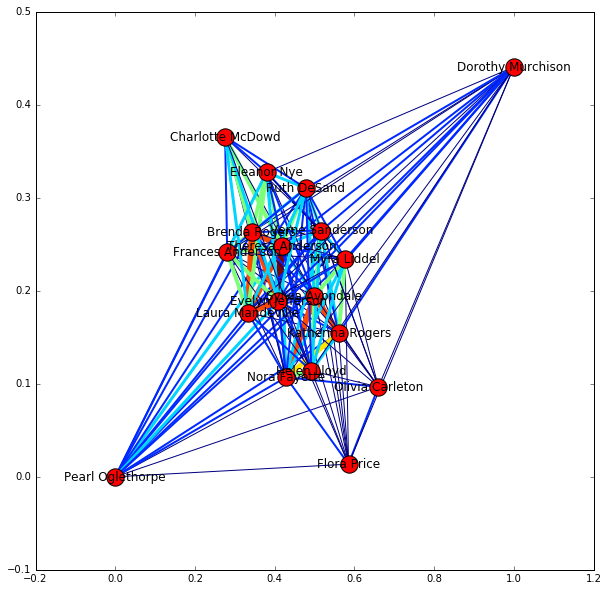

In [16]:
W = bipartite.weighted_projected_graph(G, women)
print('')
print("#Friend meetings, Member")
for w in women:
    print('%d %s' % (W.degree(w,weight='weight'),w))
# Graph weighted edges based on common clubs
weights = [edata['weight'] for f,t,edata in W.edges(data=True)]
plt.figure(figsize = (10,10))
nx.draw_networkx(W, width=weights, edge_color=weights)
#plt.show()



The graph appears to be well connected

In [17]:
# Now we will calculate degree centrality in the network
deg_cent = nx.degree_centrality(W)
deg_cent = {k:round(v,3) for k, v in deg_cent.items()}

def sort_x(x):
    sort = sorted(x.iteritems(), key=lambda (k,v):(-v,k))
    return sort

deg_cent = sort_x(deg_cent)
print deg_cent




[('Evelyn Jefferson', 1.0), ('Helen Lloyd', 1.0), ('Nora Fayette', 1.0), ('Ruth DeSand', 1.0), ('Sylvia Avondale', 1.0), ('Theresa Anderson', 1.0), ('Verne Sanderson', 1.0), ('Dorothy Murchison', 0.941), ('Katherina Rogers', 0.941), ('Myra Liddel', 0.941), ('Pearl Oglethorpe', 0.941), ('Brenda Rogers', 0.882), ('Eleanor Nye', 0.882), ('Frances Anderson', 0.882), ('Laura Mandeville', 0.882), ('Flora Price', 0.706), ('Olivia Carleton', 0.706), ('Charlotte McDowd', 0.647)]


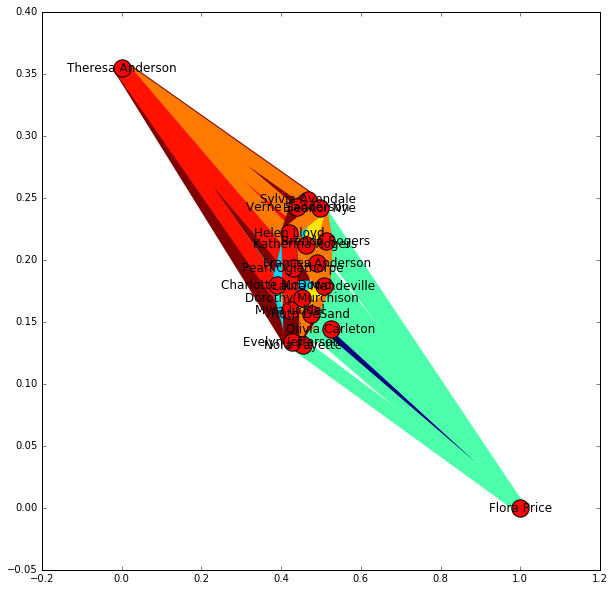

In [18]:


n.edges(data=True)
weights=[edata['weight'] for f,t,edata in n.edges(data=True)]
plt.figure(figsize=(10,10))
nx.draw_networkx(n, width=weights, edge_color=weights)
#plt.show()




Thick edges indicate strong relationships among the women



In [19]:
# Calculate number of edges adjacent each node(degree)
d = nx.degree(n)
d = {k:round(v,1) for k, v in d.items()}
d = sort_x(d)
print d


[('Brenda Rogers', 17.0), ('Charlotte McDowd', 17.0), ('Dorothy Murchison', 17.0), ('Eleanor Nye', 17.0), ('Evelyn Jefferson', 17.0), ('Flora Price', 17.0), ('Frances Anderson', 17.0), ('Helen Lloyd', 17.0), ('Katherina Rogers', 17.0), ('Laura Mandeville', 17.0), ('Myra Liddel', 17.0), ('Nora Fayette', 17.0), ('Olivia Carleton', 17.0), ('Pearl Oglethorpe', 17.0), ('Ruth DeSand', 17.0), ('Sylvia Avondale', 17.0), ('Theresa Anderson', 17.0), ('Verne Sanderson', 17.0)]
